## Week 3:

New Topics:

 * Exploratory Data Analysis
  

Coding Task:

This week, you will build off of your work from last week.
1. First, (if you haven't done so already), create a new column indicating the SHADAC classification for each Tennessee county. You can use the following code to accomplish this:
```
physicians.loc[physicians['residents_per_pcp'] < 1500, 'shadac_category'] = 'adequate'
physicians.loc[(physicians['residents_per_pcp'] >= 1500) & 
          (physicians['residents_per_pcp'] < 3500), 'shadac_category'] = 'moderately inadequate'
physicians.loc[(physicians['residents_per_pcp'] >= 3500), 'shadac_category'] = 'low inadequate'
```

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read in data files
physicians = pd.read_csv('../data/primary_care_physicians.csv')
physicians.head()
population = pd.read_csv('../data/population_by_county.csv')

In [4]:
physicians = physicians.loc[physicians['state'] == 'Tennessee']

In [5]:
# Correct column variables and merge data files; create new coluumn for residents per pcp
population['county'].str.split(' County', expand = True)
population['county']=population['county'].str.split(' County', expand = True)[0]
population = population.loc[population['state'] == 'TENNESSEE']
physicians = pd.merge(left = physicians,
         right = population[['county','population', 'urban']])
physicians['residents_per_pcp'] = physicians['population'] / physicians['primary_care_physicians']

In [6]:
# Create categories for level of care
# Use .loc to add column, picks the new shadac category based on value in 'residents_per_pcp'
physicians.loc[physicians['residents_per_pcp'] < 1500, 'shadac_category'] = 'adequate'
physicians.loc[(physicians['residents_per_pcp'] >= 1500) & 
       (physicians['residents_per_pcp'] < 3500), 'shadac_category'] = 'moderately inadequate'
physicians.loc[(physicians['residents_per_pcp'] >= 3500), 'shadac_category'] = 'low inadequate'

In [7]:
physicians.head()
## check problem have other states

,FIPS,state,county,primary_care_physicians,population,urban,residents_per_pcp,shadac_category
0,47001,Tennessee,Anderson,39.0,76061,Urban,1950.282051,moderately inadequate
1,47003,Tennessee,Bedford,15.0,48292,Rural,3219.466667,moderately inadequate
2,47005,Tennessee,Benton,3.0,16140,Rural,5380.000000,low inadequate
3,47007,Tennessee,Bledsoe,1.0,14836,Rural,14836.000000,low inadequate
4,47009,Tennessee,Blount,90.0,129927,Urban,1443.633333,adequate


2. Use this new column to investigate if there is any relationship between a county's status as urban or rural and its SHADAC classification. Create a plot showing what you find.

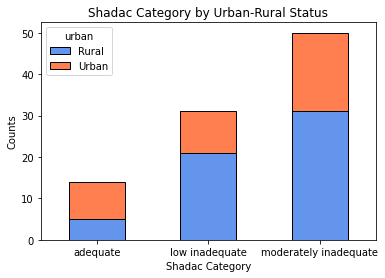

In [8]:
# this is not normalized crosstab -- just using raw values
pd.crosstab(physicians['shadac_category'], physicians['urban']).plot(kind = 'bar', 
                                                          stacked = True,       # stacked as opposed to side-by-side
                                                          color = ['cornflowerblue', 'coral', 'pink'],     # change the default colors
                                                          edgecolor = 'black')              # add a border to the bars
plt.title('Shadac Category by Urban-Rural Status')                   # add a title
plt.xlabel('Shadac Category')
plt.ylabel('Counts')
plt.xticks(rotation = 0);                                             # change the appearance of the x tick labels

In [9]:
pd.crosstab(physicians['shadac_category'], physicians['urban'],  normalize = 'index')

urban,Rural,Urban
shadac_category,,
adequate,0.357143,0.642857
low inadequate,0.677419,0.322581
moderately inadequate,0.620000,0.380000


In [10]:
# Groupby works best on categorical variables, look at unique values in urban column and separate the data 
#into two and then by shadac category
physicians.groupby(["urban", "shadac_category"]).size()

urban  shadac_category      
Rural  adequate                  5
       low inadequate           21
       moderately inadequate    31
Urban  adequate                  9
       low inadequate           10
       moderately inadequate    19
dtype: int64

3. Merge the unemployment data (contained in tn_unemployment.csv) into the physicians DataFrame.

In [11]:
unemployment = pd.read_csv('../data/tn_unemployment.csv')
#unemployment.head()

In [12]:
unemployment['Name'].str.split(' County', expand = True)
# Can use n = 1 to split on the first space .str.split(' ', n = 1, expand = True); otherwise will count on any time it
# finds the delimeter
unemployment['Name'] = unemployment['Name'].str.split(' County', expand = True)[0]
#unemployment.head()

In [13]:
physicians = pd.merge(left = physicians,
         right = unemployment.rename(columns = {'Name': 'county'}))
physicians.head()

,FIPS,state,county,primary_care_physicians,population,urban,residents_per_pcp,shadac_category,laus_code,State,County,Period,LF,Employed,Unemployed,unemployment_rate
0,47001,Tennessee,Anderson,39.0,76061,Urban,1950.282051,moderately inadequate,CN4700100000000,47,1,Mar-21,34704,33010,1694,4.9
1,47003,Tennessee,Bedford,15.0,48292,Rural,3219.466667,moderately inadequate,CN4700300000000,47,3,Mar-21,20623,19550,1073,5.2
2,47005,Tennessee,Benton,3.0,16140,Rural,5380.000000,low inadequate,CN4700500000000,47,5,Mar-21,6723,6305,418,6.2
3,47007,Tennessee,Bledsoe,1.0,14836,Rural,14836.000000,low inadequate,CN4700700000000,47,7,Mar-21,4252,3947,305,7.2
4,47009,Tennessee,Blount,90.0,129927,Urban,1443.633333,adequate,CN4700900000000,47,9,Mar-21,64098,61119,2979,4.6


4. How do unemployment rates compare for urban counties versus rural counties?

In [14]:
physicians.groupby('urban')['unemployment_rate'].mean()

urban
Rural    5.850877
Urban    4.918421
Name: unemployment_rate, dtype: float64

In [16]:
physicians.groupby('urban')['unemployment_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
urban,,,,,,,,
Rural,57.0,5.850877,0.976349,3.7,5.200,5.60,6.500,9.3
Urban,38.0,4.918421,0.759749,3.3,4.325,4.85,5.375,7.1


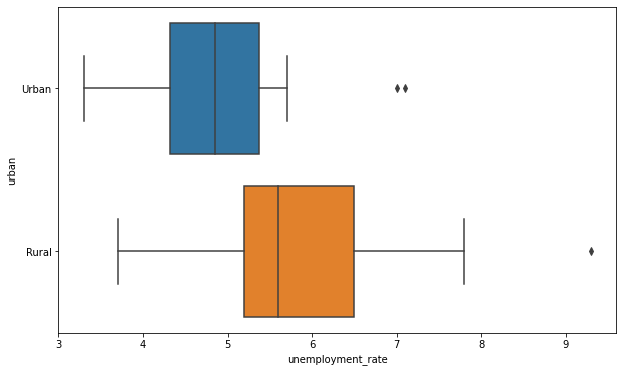

In [17]:
plt.figure(figsize = (10,6))
sns.boxplot(data = physicians,
           x = 'unemployment_rate',
           y = 'urban');

5. Create a new column, pcp_per_100k which contains the number of primary care physicians per 100,000 residents. Investigate the relationship between this new measure and the unemployment rate per county. What do you find?

In [20]:
physicians['pcp_per_100k'] = physicians['primary_care_physicians'] / physicians['population'] * 100000
physicians['pcp_per_100k'].head()

0    51.274635
1    31.061045
2    18.587361
3     6.740361
4    69.269667
Name: pcp_per_100k, dtype: float64

In [21]:
physicians[['pcp_per_100k', 'unemployment_rate']].corr()

,pcp_per_100k,unemployment_rate
pcp_per_100k,1.000000,-0.335333
unemployment_rate,-0.335333,1.000000


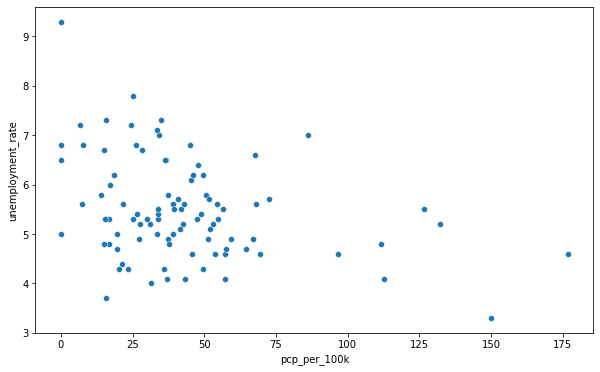

In [23]:
plt.figure(figsize = (10,6))

sns.scatterplot(data = physicians,
               x = 'pcp_per_100k',
               y = 'unemployment_rate',
               palette = ['cornflowerblue', 'coral', 'pink']);

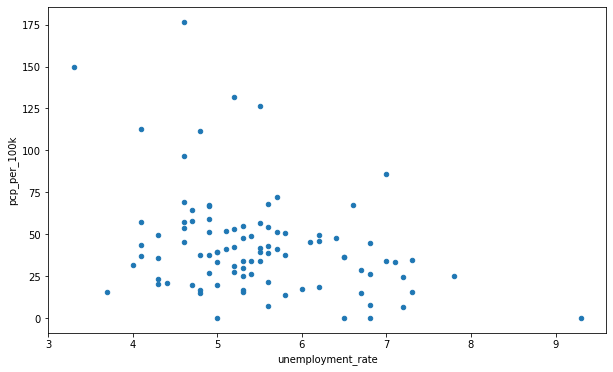

In [25]:
physicians.plot(kind = 'scatter',
             x = 'unemployment_rate',
             y = 'pcp_per_100k',
             figsize = (10,6));